# Capstone Project - Car accident severity

# Table of contents
### -Introduction
### -Data
### -Methodology
### -Analysis
### -Results and Discussion
### -Conclusion

## 1. Introduction 

I will study the effect of Road accidents. Sometimes they lead to a loss of property and even life. It would be great to be able to understand what are the most common causes, in order to prevent them from happening? 
With this analysis, I am attempting to understand these factors and their correlation. This analysis has multiple applications like an app that will prompt the drivers to be more careful depending on the weather and road conditions on any given day or a way for the police to enforce more safety protocols.

# 2. Data

## 2.1 Data Description

This is an extensive data set from the Seattle Police Department, with over 190,000 observations collected over the last 15+ years. 
To accurately build a model to prevent future accidents and/or reduce their severity, we will use the following attributes — ADDRTYPE, WEATHER, ROADCOND, VEHCOUNT, PERSONCOUNT.

## 2.2 Data Preparation

## First, let's import all the libraries that we will need

In [72]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

print('Libraries imported.')

Libraries imported.


# Importing Dataset.

In [73]:
main_df=pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")
print(main_df.head(5))

   SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY REPORTNO  \
0             2 -122.323148  47.703140         1    1307       1307  3502005   
1             1 -122.347294  47.647172         2   52200      52200  2607959   
2             1 -122.334540  47.607871         3   26700      26700  1482393   
3             1 -122.334803  47.604803         4    1144       1144  3503937   
4             2 -122.306426  47.545739         5   17700      17700  1807429   

    STATUS      ADDRTYPE   INTKEY  ... ROADCOND                LIGHTCOND  \
0  Matched  Intersection  37475.0  ...      Wet                 Daylight   
1  Matched         Block      NaN  ...      Wet  Dark - Street Lights On   
2  Matched         Block      NaN  ...      Dry                 Daylight   
3  Matched         Block      NaN  ...      Dry                 Daylight   
4  Matched  Intersection  34387.0  ...      Wet                 Daylight   

  PEDROWNOTGRNT  SDOTCOLNUM SPEEDING ST_COLCODE  \
0          

# Converting Severity Code from [1,2] tp [0,1]

In [74]:
severity_code = main_df['SEVERITYCODE'].values

labels = preprocessing.LabelEncoder()
labels.fit([1, 2])
severity_code = labels.transform (severity_code)

main_df ["SEVERITYCODE"] = severity_code
print(main_df.head(5))

   SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY REPORTNO  \
0             1 -122.323148  47.703140         1    1307       1307  3502005   
1             0 -122.347294  47.647172         2   52200      52200  2607959   
2             0 -122.334540  47.607871         3   26700      26700  1482393   
3             0 -122.334803  47.604803         4    1144       1144  3503937   
4             1 -122.306426  47.545739         5   17700      17700  1807429   

    STATUS      ADDRTYPE   INTKEY  ... ROADCOND                LIGHTCOND  \
0  Matched  Intersection  37475.0  ...      Wet                 Daylight   
1  Matched         Block      NaN  ...      Wet  Dark - Street Lights On   
2  Matched         Block      NaN  ...      Dry                 Daylight   
3  Matched         Block      NaN  ...      Dry                 Daylight   
4  Matched  Intersection  34387.0  ...      Wet                 Daylight   

  PEDROWNOTGRNT  SDOTCOLNUM SPEEDING ST_COLCODE  \
0          

# Descriptive States

In [75]:
descriptive_stats= main_df.describe(include="all")
print(descriptive_stats)

         SEVERITYCODE              X              Y       OBJECTID  \
count   194673.000000  189339.000000  189339.000000  194673.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         0.298901    -122.330518      47.619543  108479.364930   
std          0.457778       0.029976       0.056157   62649.722558   
min          0.000000    -122.419091      47.495573       1.000000   
25%          0.000000    -122.348673      47.575956   54267.000000   
50%          0.000000    -122.330224      47.615369  106912.000000   
75%          1.000000    -122.311937      47.663664  162272.000000   
max          1.000000    -122.238949      47.734142  219547.000000   

               INCKEY      COLDETKEY REPORTNO   STATUS ADDRTYPE  \
count   194673.000000  194673.000000   194673   194673   192747   
unique            NaN    

# Plotting counts of selected variables

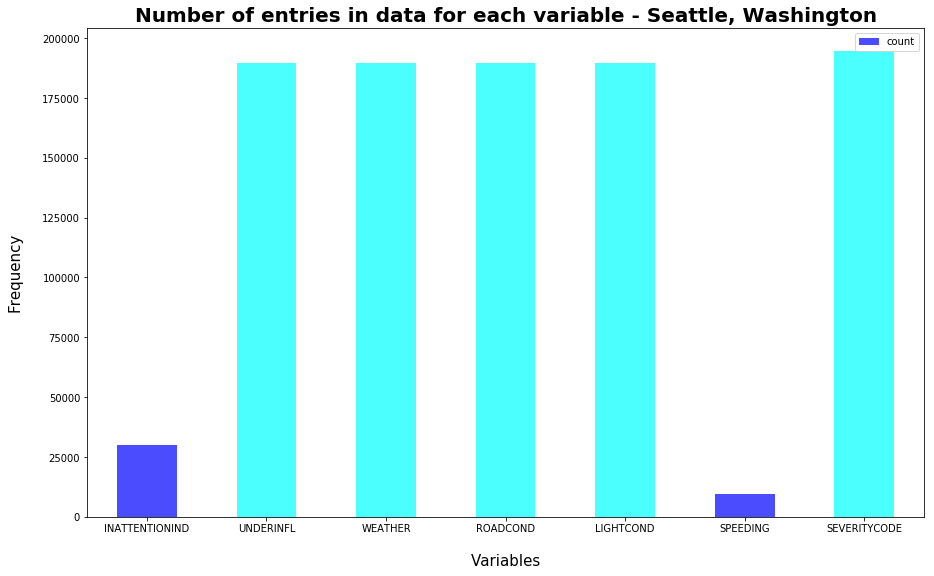

In [76]:
descriptive_stats_plot=descriptive_stats[["INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
descriptive_stats_plot.drop(['unique','top','freq','mean','std','min','max','25%','50%','75%'],axis=0,inplace=True)
descriptive_stats_plot=descriptive_stats_plot.transpose()

color_yo=['blue','Cyan','Cyan','Cyan','Cyan','blue','Cyan']
descriptive_stats_plot.plot(kind='bar',alpha=0.70,color=[color_yo], figsize=(15, 9))
plt.title('Number of entries in data for each variable - Seattle, Washington', fontsize=20, fontweight='bold')
plt.xlabel("Variables",fontsize=15,labelpad=20)
plt.ylabel("Frequency",fontsize=15,labelpad=20)
plt.xticks(rotation=360)
plt.show()

# Area type of each accident

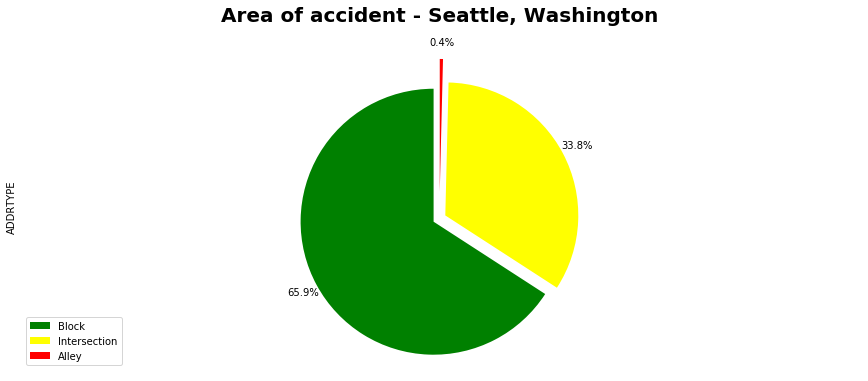

In [77]:
explode_list = [0.05, 0.05, 0.2]
color_list=['green','yellow','red']
addtype=main_df['ADDRTYPE'].value_counts()

addtype.plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%',
            startangle=90,
            shadow=None,
            labels=None,
            pctdistance=1.12,
            colors=color_list,
            explode=explode_list)


plt.title('Area of accident - Seattle, Washington', fontsize=20, fontweight='bold', y=1.05)
plt.axis('equal')
plt.legend(labels=addtype.index, loc='lower left')

plt.show()



# Check IncKey unqiue numbers

In [78]:
main_df['INCKEY'].nunique()

194673

### Encoding in attention (0 = No, 1 = Yes)

In [79]:
main_df["INATTENTIONIND"].replace("Y", 1, inplace=True)
main_df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)

### Encoding Under the influence (0 = No, 1 = Yes)

In [80]:
main_df["UNDERINFL"].replace("N", 0, inplace=True)
main_df["UNDERINFL"].replace("Y", 1, inplace=True)

### Encoding Speeding(0 = No, 1 = Yes)

In [81]:
main_df["SPEEDING"].replace("Y", 1, inplace=True)
main_df["SPEEDING"].replace(np.nan, 0, inplace=True)

### Encoding Light Conditions(0 = Light, 1 = Medium, 2 = Dark)

In [82]:
main_df["LIGHTCOND"].replace("Daylight", 0, inplace=True)
main_df["LIGHTCOND"].replace("Dark - Street Lights On", 1, inplace=True)
main_df["LIGHTCOND"].replace("Dark - No Street Lights", 2, inplace=True)
main_df["LIGHTCOND"].replace("Dusk", 1, inplace=True)
main_df["LIGHTCOND"].replace("Dawn", 1, inplace=True)
main_df["LIGHTCOND"].replace("Dark - Street Lights Off", 2, inplace=True)
main_df["LIGHTCOND"].replace("Dark - Unknown Lighting", 2, inplace=True)
main_df["LIGHTCOND"].replace("Other","Unknown", inplace=True)

### Encoding Weather Conditions(0 = Clear, 1 = Overcast and Cloudy, 2 = Windy, 3 = Rain and Snow

In [83]:
main_df["WEATHER"].replace("Clear", 0, inplace=True)
main_df["WEATHER"].replace("Raining", 3, inplace=True)
main_df["WEATHER"].replace("Overcast", 1, inplace=True)
main_df["WEATHER"].replace("Other", "Unknown", inplace=True)
main_df["WEATHER"].replace("Snowing", 3, inplace=True)
main_df["WEATHER"].replace("Fog/Smog/Smoke", 2, inplace=True)
main_df["WEATHER"].replace("Sleet/Hail/Freezing Rain", 3, inplace=True)
main_df["WEATHER"].replace("Blowing Sand/Dirt", 2, inplace=True)
main_df["WEATHER"].replace("Severe Crosswind", 2, inplace=True)
main_df["WEATHER"].replace("Partly Cloudy", 1, inplace=True)

### Encoding Road Conditions(0 = Dry, 1 = Mushy, 2 = Wet)

In [84]:
main_df["ROADCOND"].replace("Dry", 0, inplace=True)
main_df["ROADCOND"].replace("Wet", 2, inplace=True)
main_df["ROADCOND"].replace("Ice", 2, inplace=True)
main_df["ROADCOND"].replace("Snow/Slush", 1, inplace=True)
main_df["ROADCOND"].replace("Other", "Unknown", inplace=True)
main_df["ROADCOND"].replace("Standing Water", 2, inplace=True)
main_df["ROADCOND"].replace("Sand/Mud/Dirt", 1, inplace=True)
main_df["ROADCOND"].replace("Oil", 2, inplace=True)

# Making new dataframe with only variables and unique keys

In [85]:
selected_columns=main_df[["X","Y","INCKEY","INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
feature_df=selected_columns.copy()
feature_df.dropna(axis=0,how='any',inplace=True)
feature_stats=feature_df.describe()

np.count_nonzero(feature_df['UNDERINFL'])

86923

# Light Condition

In [86]:
lightcondsize = feature_df ["LIGHTCOND"].size

featureinlightcond = feature_df ['LIGHTCOND'] == 'Unknown'

lightcond = feature_df['LIGHTCOND']
lightcond = lightcond.values
lightcond = lightcond[featureinlightcond]

lightcond[0:9036]=0
lightcond[9036:13417]=1
lightcond[13417:13961]=2

feature_df.loc [feature_df.LIGHTCOND == "Unknown", 'LIGHTCOND'] = lightcond

feature_df["LIGHTCOND"]=feature_df["LIGHTCOND"].astype(int)

# Road Condition

In [87]:
roadcondsize = feature_df ["ROADCOND"].size

featureinroadcond = feature_df ['ROADCOND'] == 'Unknown'

roadcond = feature_df['LIGHTCOND']
roadcond = roadcond.values
roadcond = roadcond[featureinroadcond]

roadcond[0:9954]=0
roadcond[9954:10040]=1
roadcond[10040:15163]=2

feature_df.loc[feature_df.ROADCOND == "Unknown", 'ROADCOND'] = roadcond
feature_df["ROADCOND"]=feature_df["ROADCOND"].astype(int)

# Weather Condition

In [88]:
weathersize = feature_df ["WEATHER"].size

featureinweather = feature_df ['WEATHER'] == 'Unknown'

weather = feature_df['WEATHER']
weather = weather.values
weather = weather[featureinweather]

weather[0:10151]=0
weather[10151:12683]=1
weather[12683:12742]=2
weather[12742:15864]=3

feature_df.loc[feature_df.WEATHER == "Unknown", 'WEATHER'] = weather
feature_df["WEATHER"]=feature_df["WEATHER"].astype(int)

# Converting remaining to int

In [89]:
feature_df["SPEEDING"]=feature_df["SPEEDING"].astype(int)
feature_df["INATTENTIONIND"]=feature_df["INATTENTIONIND"].astype(int)
feature_df["UNDERINFL"]=feature_df["UNDERINFL"].astype(int)

# ML Feature Sets

In [90]:
X=feature_df[["SPEEDING","INATTENTIONIND","UNDERINFL","ROADCOND","WEATHER","LIGHTCOND"]].values
y=feature_df[["SEVERITYCODE"]].values

# Test/Train split

In [91]:
import scipy as sp
from scipy import stats
!conda install -c conda-forge imbalanced-learn

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - imbalanced-learn


The following packages will be UPDATED:

    ca-certificates:  2018.10.15-ha4d7672_0 conda-forge/label/gcc7 --> 2020.6.20-hecda079_0     conda-forge
    certifi:          2018.8.24-py36_1001   conda-forge/label/gcc7 --> 2020.6.20-py36h9880bd3_2 conda-forge
    imbalanced-learn: 0.3.3-py_0            conda-forge/label/gcc7 --> 0.7.0-py_1               conda-forge
    scikit-learn:     0.19.2-py36h4989274_0                        --> 0.23.2-py36h0573a6f_0               

Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [ ]:
!conda install -c conda-forge/label/gcc7 imbalanced-learn
!conda install -c conda-forge/label/cf201901 imbalanced-learn

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - imbalanced-learn


The following packages will be DOWNGRADED:

    ca-certificates:  2020.6.20-hecda079_0     conda-forge --> 2018.10.15-ha4d7672_0 conda-forge/label/gcc7
    certifi:          2020.6.20-py36h9880bd3_2 conda-forge --> 2018.8.24-py36_1001   conda-forge/label/gcc7
    imbalanced-learn: 0.7.0-py_1               conda-forge --> 0.3.3-py_0            conda-forge/label/gcc7
    scikit-learn:     0.23.2-py36h0573a6f_0                --> 0.19.2-py36h4989274_0                       

Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: \ 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# Balance the Data

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
os = SMOTE (random_state=0)
os_data_X, os_data_y= os.fit_sample(X_train, y_train)

# Make reduced df from feature_df to get a few random points to make map

In [ ]:
limit = 100005
reduced_df = feature_df.iloc [0:limit:5, 0:]

# Folium Map

### let's start  with a clean copy of the map of San Francisco

In [ ]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

In [ ]:
import folium
import webbrowser
from folium import plugins

In [ ]:
seattle_map = folium.Map(location=[47.61536892, -122.3302243], zoom_start=10)

In [ ]:
url="https://www.citypopulation.de/en/germany/essen/admin/"
source = requests.get(url).text
soup = BeautifulSoup(source, 'html')

# get the table from the webpage
table = soup.find('table',{'class':"data"})
#soup.select('div > p')[1].get_text(strip=True)
table_rows = table.find_all('tr')

#table_rows
data = []
for row in table_rows:
    data.append([t.text.strip() for t in row.find_all('td')])
df = pd.DataFrame(data)
df.columns = ['Name', 'Status', 'b', 'c', 'd', 'Population', 'e']
#The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
df.drop(columns=['b','c','d','e'],inplace=True)

df.drop([0],inplace = True)
Borough_df = df[df['Status'].str.contains('Borough')] 
Borough_df = Borough_df.reset_index(drop=True)

Borough_df['Population'] = Borough_df['Population'].astype('str')
Borough_df['Population'] = Borough_df['Population'].str.replace(',', '')
Borough_df['Population'] = pd.to_numeric(Borough_df['Population'], errors='coerce')

print(Borough_df)

In [ ]:
Borough_df.dtypes

In [ ]:
url="https://de.wikipedia.org/wiki/Benutzer_Diskussion:Hassan_Yousef_1985"
source = requests.get(url).text
soup = BeautifulSoup(source, 'html')

# get the table from the webpage
table = soup.find('table',{'class':'wikitable'})
table_rows = table.find_all('tr')

#table_rows
data = []
for row in table_rows:
    data.append([t.text.strip() for t in row.find_all('td')])

#The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
df_km = pd.DataFrame(data, columns=['Borough', 'Area in km²', 'Population','Population Density'])
df_km.drop([0],inplace = True)
df_km = df_km.reset_index(drop=True) # to start index with 0
print(df_km)

In [ ]:
df_km.dtypes

### Convert the column "Area in km²" from type "object" to type "float64"

In [ ]:
df_km['Area in km²'] = df_km['Area in km²'].astype('str')
df_km['Area in km²'] = df_km['Area in km²'].str.replace(',', '.')
df_km['Area in km²'] = pd.to_numeric(df_km['Area in km²'], errors='coerce')

In [ ]:
print(df_km)

In [ ]:
df_km.dtypes

In [ ]:
url="https://en.wikipedia.org/wiki/User:Hassan_Yousef_1985/sandbox"
source = requests.get(url).text
soup = BeautifulSoup(source, 'html')

# get the table from the webpage
table = soup.find('table',{'class':'wikitable'})
table_rows = table.find_all('tr')

#table_rows
data = []
for row in table_rows:
    data.append([t.text.strip() for t in row.find_all('td')])

#The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
df = pd.DataFrame(data, columns=['Borough','Under 18'])
df.drop([0],inplace = True)
df = df.reset_index(drop=True) # to start index with 0
print(df)

## Load the coordinates of the boroughs into a dataframe.

In [ ]:
from pandas import read_excel
my_sheet = 'Sheet1' # change it to the sheet name
file_name = 'Lon-Lat.xlsx' # change it to the name of your excel file
df_lon_lat = read_excel(file_name, sheet_name = my_sheet)
print(df_lon_lat) # shows headers with top 5 rows

## Load the population and population density of each borough into a new dataframe.

In [ ]:
url="https://de.wikipedia.org/wiki/Benutzer_Diskussion:Hassan_Yousef_1985"
source = requests.get(url).text
soup = BeautifulSoup(source, 'html')

# get the table from the webpage
table = soup.find('table',{'class':'wikitable'})
table_rows = table.find_all('tr')

#table_rows
data = []
for row in table_rows:
    data.append([t.text.strip() for t in row.find_all('td')])

#The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
df_population = pd.DataFrame(data, columns=['Borough', 'Area in km²', 'Population','Population Density'])
df_population.drop([0],inplace = True)
df_population.drop(df_population.columns[1],axis=1, inplace = True)
df_population = df_population.reset_index(drop=True) # to start index with 0
print(df_population)

## Load the the percentage of underages in each borough into a new dataframe.

In [ ]:
my_sheet = 'Sheet1' # change it to the sheet name
file_name = 'under18.xlsx' # change it to the name of your excel file
df_18 = read_excel(file_name, sheet_name = my_sheet)
df_18 = df_18.rename(columns={'under 18':'under_18'})
df_18['Percentage under 19 years old'] = (df_18['under_18'] * 100)/ df_18['under_18'].sum()
print(df_18) # shows headers with top 5 rows

## Let's now apply some math into a dataframes df_population and df_18 to obtain the population of full age and create a new dataframe df_population

In [ ]:
df_population['Population'] = df_18["total"].subtract(df_18["under_18"])
df_population['Population Density'] =  round(df_population['Population'].div(df_km['Area in km²']))
df_population[['Population Density','Population']] = df_population[['Population Density','Population']].astype('int64')
print(df_population)

## Load the the data of Net income per person in each borough into a new dataframe.

In [ ]:
my_sheet = 'Sheet1' # change it to the sheet name
file_name = 'Net_income.xlsx' # change it to the name of your excel file
df_income = read_excel(file_name, sheet_name = my_sheet)
df_income = df_income.rename(columns={'Net income':'Net_income'})
print(df_income) # shows headers with top 5 rows

## Let us merege two dataframes

In [ ]:
df1 = df_lon_lat.join(df_population.set_index('Borough'), on='Borough')
df2 = df1.join(df_income.set_index('Borough'), on='Borough')
print(df2)

## Use geopy library to get the latitude and longitude values of Essen City.

In [ ]:
address = 'Essen'
geolocator = Nominatim(user_agent="hy_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Essen are {}, {}.'.format(latitude, longitude))

## Define Foursquare Credentials and Version.

In [ ]:
CLIENT_ID = 'CZY0LLMAXSKEO2SSHA2143QJTLT31ECR11LHEUNKQSKRKOSP' #  Foursquare ID
CLIENT_SECRET = 'SCCUW1BWQHHQ5ZNAGC3AU4XER4OME5IBEE5FDYBG4ZC4TWDD' #  Foursquare Secret
VERSION = '20200804' # Foursquare API version

print('The credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

## Create a function to repeat the process of exploring the venues for all the neighborhoods in Essen

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## Create a new dataframe called Essen_venues

In [ ]:
LIMIT = 100
radius = 1000
Essen_venues = getNearbyVenues(names=df2['Borough'],
                                   latitudes=df2['Latitude'],
                                   longitudes=df2['Longitude'],
                                   radius = radius
                                  )

In [ ]:
print(Essen_venues.shape)
print(Essen_venues)

## Let's check how many venues were returned for each neighborhood

In [ ]:
print(Essen_venues.groupby('Borough').count())

## Let's check how many venues were returned for each neighborhood in special cases

In [ ]:
Essen_venues[(Essen_venues['Venue Category'].str.contains('Beer', regex=False)) |
             (Essen_venues['Venue Category'].str.contains('Beer Garden', regex=False)) |
             (Essen_venues['Venue Category'].str.contains('Restaurant', regex=False)) |
             (Essen_venues['Venue Category'].str.contains('Bar', regex=False)) |
             (Essen_venues['Venue Category'].str.contains('Taverna', regex=False))].count()

In [ ]:
Essen_venues[(Essen_venues['Venue Category'].str.contains('Beer', regex=False)) |
             (Essen_venues['Venue Category'].str.contains('Beer Garden', regex=False)) |
             (Essen_venues['Venue Category'].str.contains('German Restaurant', regex=False)) |
             (Essen_venues['Venue Category'].str.contains('Bar', regex=False)) |
             (Essen_venues['Venue Category'].str.contains('Taverna', regex=False))].count()

## Let's check how many Restaurants were returned for each neighborhood

In [ ]:
Essen_restaurant = Essen_venues[(Essen_venues['Venue Category'].str.contains('Beer', regex=False)) |
                 (Essen_venues['Venue Category'].str.contains('Beer Garden', regex=False)) |
                 (Essen_venues['Venue Category'].str.contains('Restaurant', regex=False)) |
                 (Essen_venues['Venue Category'].str.contains('Bar', regex=False)) |
                 (Essen_venues['Venue Category'].str.contains('Taverna', regex=False))].groupby(['Borough']).count()
Essen_restaurant.drop(['Borough Latitude', 'Borough Longitude', 'Venue Longitude', 'Venue', 'Venue Latitude'], axis = 1, inplace = True)
Essen_restaurant.rename(columns = {'Venue Category':'Number of restaurants'}, inplace=True)
print(Essen_restaurant)

## Let's check how many Beer Restaurants were returned for each neighborhood

In [ ]:
Essen_beer = Essen_venues[(Essen_venues['Venue Category'].str.contains('Beer', regex=False)) |
                 (Essen_venues['Venue Category'].str.contains('Beer Garden', regex=False)) |
                 (Essen_venues['Venue Category'].str.contains('German Restaurant', regex=False)) |
                 (Essen_venues['Venue Category'].str.contains('Bar', regex=False)) |
                 (Essen_venues['Venue Category'].str.contains('Taverna', regex=False))].groupby(['Borough']).count()
Essen_beer.drop(['Borough Latitude', 'Borough Longitude', 'Venue Longitude', 'Venue', 'Venue Latitude'], axis = 1, inplace = True)
Essen_beer.rename(columns = {'Venue Category':'Number of beer restaurants'}, inplace=True)
print(Essen_beer)

## join above dataframe to the main df_lon_lat

## Number of the restaurants with the main dataframe

In [ ]:
df_res = df2.join(Essen_restaurant, on='Borough')
print(df_res)

## Number of the beer restaurants with the main dataframe

In [ ]:
df_res_beer = df_res.join(Essen_beer, on='Borough')
print(df_res_beer)

In [ ]:
df_res_beer['Number of beer restaurants']

# 3. Methodology and Analysis

After cleaning and preparing the data, let us identify the steps, that have to be performed in order to find the most optimal boroughs. Firstly, we will apply some basic exploratory analysis to our data. For that let's find the location of each borough on the map. Then we can visually inspect some values in our data with the help of bar charts. Secondly, we have the possibility to reduce the number features in data frame by replacing them with more reasonable data. Finally, we will perform cluster analysis to find the best cluster of boroughs with meaningful features.

## 3.1 Exploratory Data Analysis

## Let's first derive some basic statistical values of our data.

In [ ]:
print(df_res_beer.describe())

## It's also would be quite useful to visualize the center locations of each borough. For that, we need to create a map of Essen with boroughs superimposed on top.

In [ ]:
# create map of Essen  using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df_res_beer['Latitude'], df_res_beer['Longitude'], df_res_beer['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

## Visualization. In our case barcharts will be utilized.

In [ ]:
conda install -c anaconda pandas-profiling

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

In [ ]:
df_res_beer['Population'] = df_res_beer['Population'].astype('str')
df_res_beer['Population'] = df_res_beer['Population'].str.replace(',', '')
df_res_beer['Population'] = pd.to_numeric(df_res_beer['Population'], errors='coerce')

df_res_beer['Population Density'] = df_res_beer['Population Density'].astype('str')
df_res_beer['Population Density'] = df_res_beer['Population Density'].str.replace(',', '')
df_res_beer['Population Density'] = pd.to_numeric(df_res_beer['Population Density'], errors='coerce')
df_res_beer[['Borough','Population' ,'Population Density']].dtypes

In [ ]:
# step 2: plot data
df_res_beer[['Borough', 'Population']].plot(kind='barh', figsize=(15, 9), legend = None)

plt.xlabel('Number of inhabitants') # add to x-label to the plot
plt.ylabel('Borough') # add y-label to the plot
plt.title('Population in Essen (2020)') # add title to the plot
plt.yticks (np.arange(9), df_res_beer['Borough'])
plt.show()

In [ ]:
# step 2: plot data
df_res_beer[['Borough', 'Population Density']].plot(kind='barh', figsize=(15, 9), legend = None)

plt.xlabel('Population Density') # add to x-label to the plot
plt.ylabel('Borough') # add y-label to the plot
plt.title('Population density in Essen (2020)') # add title to the plot
plt.yticks (np.arange(9), df_res_beer['Borough'])
plt.show()

In [ ]:
# step 2: plot data
df_res_beer[['Borough','Number of restaurants']].plot(kind='barh', figsize=(15, 9), legend = None)
#df[['Borough', 'Population']].plot(kind='barh', figsize=(15, 9), legend = None)
plt.xlabel('Number of Restaurants') # add to x-label to the plot
plt.ylabel('Borough') # add y-label to the plot
plt.title('Restaurants in Essen (2020)') # add title to the plot
plt.yticks (np.arange(9), df_res_beer['Borough'])
plt.show()

In [ ]:
# step 2: plot data
df_res_beer[['Borough','Number of beer restaurants']].plot(kind='barh', figsize=(15, 9), legend = None)
#df[['Borough', 'Population']].plot(kind='barh', figsize=(15, 9), legend = None)
plt.xlabel('Number of beer Restaurants') # add to x-label to the plot
plt.ylabel('Borough') # add y-label to the plot
plt.title('Beer Restaurants in Essen (2020)') # add title to the plot
plt.yticks (np.arange(9), df_res_beer['Borough'])
plt.show()

In [ ]:
# step 2: plot data
df_res_beer[['Borough','Net_income']].plot(kind='barh', figsize=(15, 9), legend = None)
#df[['Borough', 'Population']].plot(kind='barh', figsize=(15, 9), legend = None)
plt.xlabel('Net income per person') # add to x-label to the plot
plt.ylabel('Borough') # add y-label to the plot
plt.title('Net income in Essen (2020)') # add title to the plot
plt.yticks (np.arange(9), df_res_beer['Borough'])
plt.show()

In [ ]:
# step 2: plot data
df_res_beer[['Number of restaurants', 'Number of beer restaurants']].plot(kind='barh', figsize=(15, 9), width = 0.8)
plt.ylabel('Borough') # add y-label to the plot
plt.title('Number of restaurants') # add title to the plot
plt.yticks (np.arange(9), df['Borough'])
plt.show()

## 3.2 Cluster Analysis

In order to identify groups (clusters) with similar characteristics, let's us apply the unsupervised learning method to our data, namely K-Means algorithm. But before that, we can reduce the number of features and remove columns "Population", "Number of restaurants" and "Number of beer restaurants". These three columns we can replace with two new ones, namely, "Number of restaurants per thousand people" and "Number of beer restaurants per thousand people".

In [ ]:
df_clusters = df_res_beer.drop(['Borough','Latitude', 'Longitude', 'Population Density'],axis = 1)
df_clusters['Number of restaurants per 1000 people'] = df_clusters['Number of restaurants']/(df_clusters['Population']/1000)
df_clusters['Number of beer restaurants per 1000 people'] = df_clusters['Number of beer restaurants']/(df_clusters['Population']/1000)
df_clusters = df_clusters.drop(['Population', 'Number of restaurants', 'Number of beer restaurants'], axis = 1)
df_clusters.head()

### We have to do some Normalizarion

In [ ]:
from sklearn.preprocessing import StandardScaler
df_clusters = StandardScaler().fit_transform(df_clusters)
df_clusters

## we want to replace nan(Not A Number) with zero

In [ ]:
M = pd.DataFrame(df_clusters)
df_clusters =M

In [ ]:
df_clusters.fillna(0, inplace=True)

In [ ]:
df_clusters

### To identify the optimal number of clusters, the Elbow method is used:

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np


distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_clusters)
    kmeanModel.fit(df_clusters)
    distortions.append(sum(np.min(cdist(df_clusters, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_clusters.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### On the graph, we can see that 3 clusters are enough

In [ ]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_clusters)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:9]

### Let's insert the Cluster labels into our master dataframe.

In [ ]:
df_res_beer.insert(0, 'Cluster Labels', kmeans.labels_)
df_res_beer

### Now, it's time to create maps representing our clusters. The first map is illustrating the clusters where the radius of the Circle marker is proportional to a Number of restaurants per 1000 people in each borough.

In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
colours = ['red', 'black', 'blue']
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, income in zip(df_res_beer['Latitude'], df_res_beer['Longitude'], df_res_beer['Borough'], df_res_beer['Cluster Labels'], df_clusters.iloc[:,1]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=income*5+15,
        popup=label,
        #color=rainbow[cluster-1],
        color=colours[cluster],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_color=colours[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### The second map is illustrating the clusters where the radius of the Circle marker is proportional to a Net income per person in each borough.

In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
colours = ['red', 'black', 'blue']
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, income in zip(df_res_beer['Latitude'], df_res_beer['Longitude'], df_res_beer['Borough'], df_res_beer['Cluster Labels'], df_res_beer['Net_income']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=income*0.5-25,
        popup=label,
        #color=rainbow[cluster-1],
        color=colours[cluster],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_color=colours[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### We can see that one of the clusters (black circle) consists only of one borough - Stadtbezirk IX. Let's look at the scatter plots of our data and define our clusters with colors. The grey circle marker is representing the centroid of each cluster. Don't forger that our data is normalized, so the axes do not deliver real values.

In [ ]:
import matplotlib.pyplot as plt
y_kmeans = kmeans.predict(df_clusters)
plt.scatter(df_clusters.iloc[:, 0], df_clusters.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.xlabel('Net income per person')
plt.ylabel('Number of restaurants per 1000 people')
plt.show()

In [ ]:
y_kmeans = kmeans.predict(df_clusters)
plt.scatter(df_clusters.iloc[:, 0], df_clusters.iloc[:, 2], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c='black', s=200, alpha=0.5);
plt.xlabel('Net income per person')
plt.ylabel('Number of beer restaurants per 1000 people')
plt.show()

In general, this borough has a good concentraition of beer restaurants and restaurants in general. From maps above we can easily say that it is Stadtbezirk IX. Two other clusters were defined according to a Net income per person. Let us see which boroughs belongs to which clusters.

In [ ]:
df_res_beer[(df_res_beer['Cluster Labels'] == 0)]

In [ ]:
df_res_beer[(df_res_beer['Cluster Labels'] == 2)]

In [ ]:
df_res_beer[(df_res_beer['Cluster Labels'] == 1)]

# 4. Results and discussion

##### During the analysis, three clusters were defined. One cluster, that consists of only one area, has been defined as the outsider, due to the high number of competitors, which means that the placement of beer restaurant in that area is too risky venture. Two other groups were clustered according to the amount income per person. It is obvious, that the cluster with highest average income per person has the highest priority for us (Cluster 2).
##### Stadtbezirk II and Stadtbezirk III are the most attractive options in terms of distances to the center of their own cluster and relatively high value of income per person. However, one can perform further analysis of this particular cluster with additional features, such as distance to the center of city or to the center of cluster. After defining a borough one can perform deeper analysis to find the best exact location of the restaurant taking into account factors such as number of parking places in the vicinity of the spot or distances to the main streets.
##### What could be done better? 
##### Foursquare doesn't represent the full picture, since many venues are not on the list. For that reason, another maps could be utilized such as Google map or Openstreet map.
##### Boroughs have too complex geometry, thus defining the closest venues within the certain radius brings additional error to our analysis.

# 5. Conclusion

##### To conclude, the basic data analysis was performed to identify the most optimal boroughs for the placement of the beer restaurant in the city of Essen. During the analysis, several important statistical features of the boroughs were explored and visualized. Furthermore, clustering helped to highlight the group of optimal areas. Finally, Stadtbezirk II and Stadtbezirk III were chosen as the most attractive options for the further analysis.